Attempt to build my own BEV model instead

In [1]:
from train_nuscenes import *
from nuscenesdataset import * 
# data_dir='../nuscenes/
data_dir = '/mnt/d/Data/NuScene-mini'
%matplotlib inline
from nuscenes.nuscenes import NuScenes
from nuscenes.nuscenes import NuScenesExplorer
from PIL import Image
from nuscenes.utils.geometry_utils import view_points, box_in_image, BoxVisibility, transform_matrix

# NuScene dataset reader
nusc = NuScenes(version='v1.0-mini', dataroot=data_dir, verbose=True)
nusc_exp = NuScenesExplorer(nusc)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.020 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [2]:
crop_offset = 0
resize_lim = [1.0,1.0]
res_scale=2
final_dim = (int(224 * res_scale), int(400 * res_scale))
ncams = 6
print('resolution:', final_dim)
data_aug_conf = {
        'crop_offset': crop_offset,
        'resize_lim': resize_lim,
        'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT',
                 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': ncams,
    }

# nusc, is_train, data_aug_conf, centeroid, bounds, res_3d,
# nsweeps, seqlen, refcam_id, get_tids, temporal_aug, use_radar_filters,
# do_shuffle_cams
bounds3d = 0,100,-20,20, 0,3
resolution3d = 100.0, 40.0, 3.0
# nudata = NuscData(nusc, True, data_aug_conf, bounds=bounds3d, res_3d=resolution3d)

resolution: (448, 800)


* Rebuild of Nusc BEV Dataset: Version that is completely ready for visualization
* Make use of the smaller functionals, not the big & dumb skeletons

In [3]:
from player import *
nusc_bev = Nusc_bev(nusc, False, data_aug_conf=False)

Creating Instance


In [4]:
idx = 28

imgs, img_metas, boxes_ego, intrins, extrins = nusc_bev.get_bev_bbox(3)

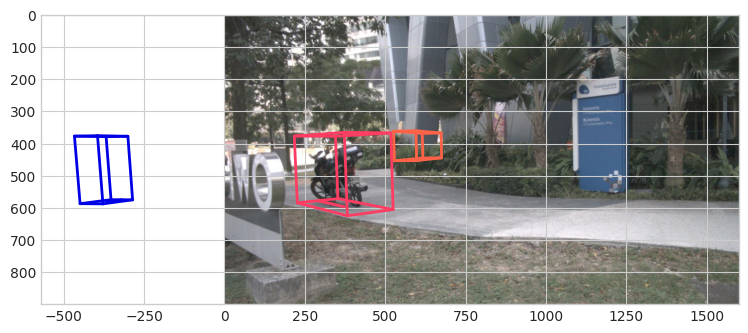

In [5]:
nusc_bev.visualize_bev_box(idx, refcam=cams[3])

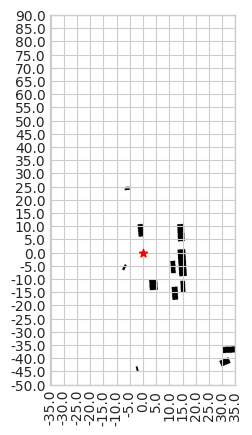

In [6]:
nusc_bev.visualize_bev_plot(idx, refcam=cams[1])